## Task-04
## Develop a hand gesture recognition model that can accurately identify and classify different hand gestures from image or video data, enabling intuitive human-computer interaction and gesture-based control systems.

## Import the necessary Libraries

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2


## dataset directory

In [2]:
# Path to the dataset directory
data_dir = 'C:/Users/Admin/Desktop/dataset'  

## Image Data Generator for data augmentation

In [3]:
# Image Data Generator for data augmentation
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2  # Split data into training and validation sets
)

# Load and preprocess training data
train_data = datagen.flow_from_directory(
    data_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

# Load and preprocess validation data
val_data = datagen.flow_from_directory(
    data_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


Found 6 images belonging to 3 classes.
Found 0 images belonging to 3 classes.


## Function to visualize some training images

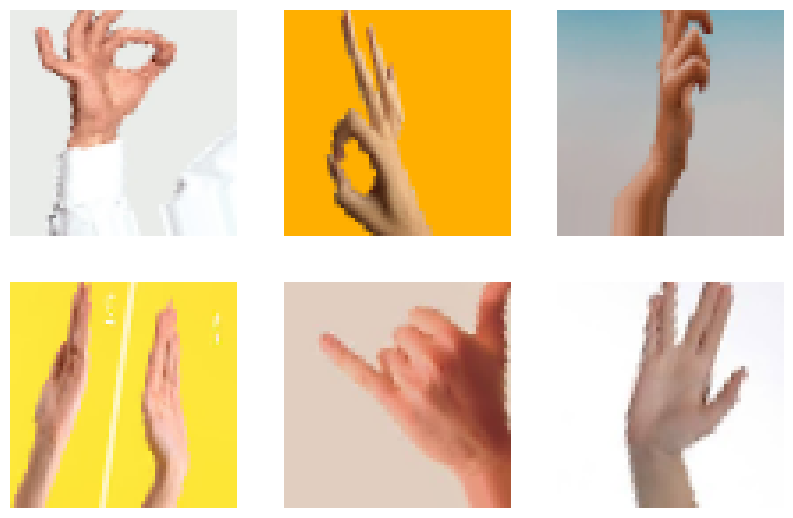

In [6]:
# Function to visualize some training images
def visualize_images(data):
    x, y = next(data)
    plt.figure(figsize=(10, 10))
    for i in range(min(len(x), 9)):  # Ensure we only iterate over the available images
        plt.subplot(3, 3, i + 1)
        plt.imshow(x[i])
        plt.axis('off')
    plt.show()

visualize_images(train_data)


## Compile the model

In [9]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


## Save the model

In [15]:
# Save the model
model.save('hand_gesture_model.keras')


## data directory path

In [23]:
# Set the correct data directory
data_dir = 'C:/Users/user/Desktop/gesture_dataset'


## verify the data generator

In [24]:
# Verify Data Generators
try:
    # Fetch a batch of data from the training generator
    x_train, y_train = next(train_data)
    # Print the shape of the training data batch
    print(f"Train batch shape: {x_train.shape}, {y_train.shape}")

    # Fetch a batch of data from the validation generator
    x_val, y_val = next(val_data)
    # Print the shape of the validation data batch
    print(f"Validation batch shape: {x_val.shape}, {y_val.shape}")

except Exception as e:
    # If an error occurs, print the error message
    print(f"Error in data generator: {e}")


Train batch shape: (6, 64, 64, 3), (6, 3)
Validation batch shape: (0, 64, 64, 3), (0, 3)


In [27]:
# Save the model architecture to JSON file
model_json = model.to_json()
with open("hand_gesture_model.json", "w") as json_file:
    json_file.write(model_json)


In [28]:
from tensorflow.keras.models import model_from_json

# Load the model architecture from JSON file
with open('hand_gesture_model.json', 'r') as json_file:
    loaded_model_json = json_file.read()

# Create model from JSON
loaded_model = model_from_json(loaded_model_json)


In [29]:
# Load weights into the model
loaded_model.load_weights('hand_gesture_model.h5')


In [37]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Example: Load two images
image_path_1 = 'C:/Users/Admin/Desktop/dataset/gesture1/image1.jpg'
image_path_2 = 'C:/Users/Admin/Desktop/dataset/gesture1/image2.jpg'

# Define target size for resizing images
height = 224
width = 224

# Load and preprocess the images
def preprocess_image(image_path):
    img = image.load_img(image_path, target_size=(height, width))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array.astype('float32') / 255.0
    return img_array

try:
    # Preprocess the first image
    X_test_1 = preprocess_image(image_path_1)

    # Preprocess the second image
    X_test_2 = preprocess_image(image_path_2)

    # Evaluate the loaded model using the preprocessed images
    predictions_1 = loaded_model.predict(X_test_1)
    predictions_2 = loaded_model.predict(X_test_2)

    # Print predictions
    print("Predictions for image 1:", predictions_1)
    print("Predictions for image 2:", predictions_2)

except FileNotFoundError as e:
    print("Error: Image file not found. Please check the file paths:", e.filename)
except Exception as e:
    print("An error occurred:", str(e))


An error occurred: Exception encountered when calling Sequential.call().

Input 0 of layer "dense_4" is incompatible with the layer: expected axis -1 of input shape to have value 4608, but received input with shape (1, 86528)

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(1, 224, 224, 3), dtype=float32)
  • training=False
  • mask=None


In [51]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models

# Define image dimensions and batch size
img_height, img_width = 64, 64
batch_size = 32

# Define the directories for training and validation data
data_dir = 'C:/Users/Admin/Desktop/dataset/'

# Create ImageDataGenerators with validation split
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Generate batches of training and validation data
try:
    train_data = train_datagen.flow_from_directory(
        data_dir,
        target_size=(img_height, img_width),
        batch_size=batch_size,
        class_mode='categorical',
        subset='training'  # Set as training data
    )

    val_data = train_datagen.flow_from_directory(
        data_dir,
        target_size=(img_height, img_width),
        batch_size=batch_size,
        class_mode='categorical',
        subset='validation'  # Set as validation data
    )
except Exception as e:
    print(f"Error in data generation: {e}")
    train_data, val_data = None, None

# Build the model
def build_model(input_shape, num_classes):
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation='softmax')
    ])
    return model

# Ensure that train_data is not None before proceeding
if train_data:
    input_shape = (img_height, img_width, 3)
    num_classes = train_data.num_classes

    # Build and compile the model
    model = build_model(input_shape, num_classes)
    optimizer = tf.keras.optimizers.Adam()
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    try:
        # Train the model and store the history
        history = model.fit(train_data, validation_data=val_data, epochs=20)

        # Function to plot training history
        def plot_history(history):
            plt.figure(figsize=(12, 4))
            plt.subplot(1, 2, 1)
            plt.plot(history.history['accuracy'], label='accuracy')
            plt.plot(history.history['val_accuracy'], label='val_accuracy')
            plt.xlabel('Epoch')
            plt.ylabel('Accuracy')
            plt.legend()

            plt.subplot(1, 2, 2)
            plt.plot(history.history['loss'], label='loss')
            plt.plot(history.history['val_loss'], label='val_loss')
            plt.xlabel('Epoch')
            plt.ylabel('Loss')
            plt.legend()

            plt.show()

        # Plot the training history
        plot_history(history)

    except Exception as e:
        print(f"Error during model training: {e}")
else:
    print("No training data available, skipping model training.")


Found 6 images belonging to 3 classes.
Found 0 images belonging to 3 classes.
Epoch 1/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.3333 - loss: 1.1230Error during model training: Must provide at least one structure


## Function to predict on new image

In [52]:
# Function to predict gesture on new image
def predict_gesture(image_path, model):
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=(64, 64))
    img_array = tf.keras.preprocessing.image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    prediction = model.predict(img_array)
    class_idx = np.argmax(prediction[0])
    class_label = list(train_data.class_indices.keys())[list(train_data.class_indices.values()).index(class_idx)]
    return class_label

image_path = 'C:/Users/Admin/Desktop/dataset/gesture1/image1.jpg'
print(predict_gesture(image_path, model))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step
gesture1


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Define image dimensions and batch size
img_height, img_width = 64, 64
batch_size = 32

# Define the directories for training and validation data
data_dir = 'C:/Users/Admin/Desktop/dataset/'

# Create ImageDataGenerators with validation split
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Generate batches of training and validation data
try:
    train_data = train_datagen.flow_from_directory(
        data_dir,
        target_size=(img_height, img_width),
        batch_size=batch_size,
        class_mode='categorical',
        subset='training'  # Set as training data
    )

    val_data = train_datagen.flow_from_directory(
        data_dir,
        target_size=(img_height, img_width),
        batch_size=batch_size,
        class_mode='categorical',
        subset='validation'  # Set as validation data
    )
except Exception as e:
    print(f"Error in data generation: {e}")
    train_data, val_data = None, None

# Build the model
def build_model(input_shape, num_classes):
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation='softmax')
    ])
    return model

# Ensure that train_data is not None before proceeding
if train_data:
    input_shape = (img_height, img_width, 3)
    num_classes = train_data.num_classes

    # Build and compile the model
    model = build_model(input_shape, num_classes)
    optimizer = tf.keras.optimizers.Adam()
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    try:
        # Train the model and store the history
        history = model.fit(train_data, validation_data=val_data, epochs=20)

        # Function to plot training history
        def plot_history(history):
            plt.figure(figsize=(12, 4))
            plt.subplot(1, 2, 1)
            plt.plot(history.history['accuracy'], label='accuracy')
            plt.plot(history.history['val_accuracy'], label='val_accuracy')
            plt.xlabel('Epoch')
            plt.ylabel('Accuracy')
            plt.legend()

            plt.subplot(1, 2, 2)
            plt.plot(history.history['loss'], label='loss')
            plt.plot(history.history['val_loss'], label='val_loss')
            plt.xlabel('Epoch')
            plt.ylabel('Loss')
            plt.legend()

            plt.show()

        # Plot the training history
        plot_history(history)

        # Generate confusion matrix
        def plot_confusion_matrix(model, val_data):
            val_data.reset()
            predictions = model.predict(val_data)
            y_pred = np.argmax(predictions, axis=1)
            y_true = val_data.classes
            cm = confusion_matrix(y_true, y_pred)
            plt.figure(figsize=(10, 8))
            sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=val_data.class_indices.keys(), yticklabels=val_data.class_indices.keys())
            plt.xlabel('Predicted')
            plt.ylabel('True')
            plt.show()

        plot_confusion_matrix(model, val_data)

    except Exception as e:
        print(f"Error during model training: {e}")
else:
    print("No training data available, skipping model training.")


Found 6 images belonging to 3 classes.
Found 0 images belonging to 3 classes.
Epoch 1/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5000 - loss: 1.0847Error during model training: Must provide at least one structure


## visualize the augmentation

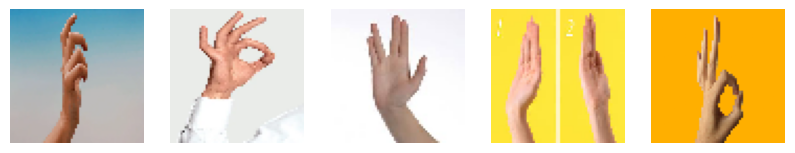

In [9]:
# Visualize data augmentation
def visualize_data_augmentation(data, augmentations=5):
    x, y = next(data)
    plt.figure(figsize=(10, 10))
    for i in range(augmentations):
        plt.subplot(1, augmentations, i + 1)
        plt.imshow(x[i])
        plt.axis('off')
    plt.show()

visualize_data_augmentation(train_data)


## print model summary

In [10]:
# Print model summary
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 29, 29, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 12, 12, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         589,952 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,050,763 (7.82 MB)

 Trainable params: 683,587 (2.61 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,367,176 (5.22 MB)